<a href="https://colab.research.google.com/github/kongqiahaha/python-/blob/master/%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E6%A1%86%E6%9E%B6tensorflow1_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
sys.path.insert(0,"./drive/My Drive/data/ 深度学习框架tensorflow 1_x")

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict
np.random.seed(1)

In [3]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

init = tf.global_variables_initializer()         # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss

9


In [4]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [6]:
sess = tf.Session()
sess.run(c)

20

In [7]:
x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


In [0]:
def linear_function():
  np.random.seed(1)
  X=tf.constant(np.random.randn(3,1),name="X")
  W=tf.constant(np.random.randn(4,3),name="W")
  b=tf.constant(np.random.randn(4,1),name="b")
  Y=tf.matmul(W,X)+b

  with tf.Session() as sess:
    result=sess.run(Y)
  return result

In [18]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [0]:
def sigmoid(z):
  z=tf.constant(z,name="z",dtype=tf.float32)
  sigmoid=tf.sigmoid(z)
  with tf.Session() as sess:
    result=sess.run(sigmoid)
  return result


In [48]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


In [0]:
def cost(logits, labels):
  z=tf.placeholder(tf.float32,name="z")
  y=tf.placeholder(tf.float32,name="y")
  cost=tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels=y)
  with tf.Session() as sess:
    cost=sess.run(cost,feed_dict={z:logits,y:labels})
  return cost

In [30]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
cost = [1.0053872  1.0366409  0.41385433 0.39956614]


In [0]:
def one_hot_matrix(labels, C):
  C=tf.constant(C,name="C")
  one_hot=tf.one_hot(labels,C,axis=0)
  with tf.Session() as sess:
    one_hot=sess.run(one_hot)
  return one_hot

In [40]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [0]:
def ones(shape):
  ones = tf.ones(shape)
  with tf.Session() as sess:
    ones = sess.run(ones)
  return ones

In [51]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


In [0]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 5


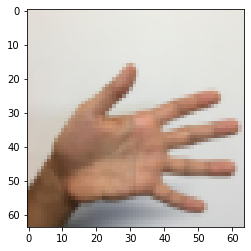

In [55]:
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [56]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [0]:
def create_placeholders(n_x, n_y):
  X=tf.placeholder(shape=[n_x,None],dtype=tf.float32)
  Y=tf.placeholder(shape=[n_y,None],dtype=tf.float32)
  return X,Y

In [60]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder_1:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Placeholder_2:0", shape=(6, ?), dtype=float32)


In [0]:
def initialize_parameters():
  W1=tf.get_variable("W1",[25,12288],initializer=tf.contrib.layers.xavier_initializer(seed=1))
  b1=tf.get_variable("b1",[25,1],initializer=tf.zeros_initializer())
  W2=tf.get_variable("W2",[12,25],initializer=tf.contrib.layers.xavier_initializer(seed=1))
  b2=tf.get_variable("b2",[12,1],initializer=tf.zeros_initializer())
  W3=tf.get_variable("W3",[6,12],initializer=tf.contrib.layers.xavier_initializer(seed=1))
  b3=tf.get_variable("b3",[6,1],initializer=tf.zeros_initializer())

  parameters={"W1":W1,"b1":b1,
        "W2":W2,"b2":b2,
        "W3":W3,"b3":b3,}
  return parameters

In [71]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [0]:
def forward_propagation(X, parameters):
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']
  Z1=tf.matmul(W1,X)+b1
  A1=tf.nn.relu(Z1)
  Z2=tf.matmul(W2,A1)+b2
  A2=tf.nn.relu(Z2)
  Z3=tf.matmul(W3,A2)+b3
  return Z3

In [72]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("add_2:0", shape=(6, ?), dtype=float32)


In [0]:
def compute_cost(Z3, Y):
  logits = tf.transpose(Z3)
  labels = tf.transpose(Y)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
  return cost

In [74]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [0]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
  ops.reset_default_graph() 
  tf.set_random_seed(1)   
  seed = 3 
  (n_x, m) = X_train.shape 
  n_y = Y_train.shape[0] 
  costs = [] 
  X,Y=create_placeholders(n_x,n_y)
  parameters=initialize_parameters()
  Z3=forward_propagation(X,parameters)
  cost = compute_cost(Z3,Y)
  optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
  init = tf.global_variables_initializer()  
  with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
      epoch_cost=0
      num_minibatches = int(m / minibatch_size)
      seed=seed+1
      minibatches=random_mini_batches(X_train, Y_train, minibatch_size, seed)
      for minibatch in minibatches:
        minibatch_X,minibatch_Y=minibatch
        _,minibatch_cost=sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
        epoch_cost += minibatch_cost / num_minibatches 
      if print_cost == True and epoch % 100 == 0:  
        print ("Cost after epoch %i: %f" % (epoch, epoch_cost))  
      if print_cost == True and epoch % 5 == 0:  
        costs.append(epoch_cost)
    plt.plot(np.squeeze(costs))  
    plt.ylabel('cost')  
    plt.xlabel('iterations (per tens)')  
    plt.title("Learning rate =" + str(learning_rate))  
    plt.show()
    parameters = sess.run(parameters)  
    print ("Parameters have been trained!")  
    correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))  
    print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
    print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
  return parameters
    


Cost after epoch 0: 1.855702
Cost after epoch 100: 1.017255
Cost after epoch 200: 0.733184
Cost after epoch 300: 0.573071
Cost after epoch 400: 0.468574
Cost after epoch 500: 0.381228
Cost after epoch 600: 0.313815
Cost after epoch 700: 0.253708
Cost after epoch 800: 0.203900
Cost after epoch 900: 0.166453
Cost after epoch 1000: 0.146636
Cost after epoch 1100: 0.107281
Cost after epoch 1200: 0.086697
Cost after epoch 1300: 0.059341
Cost after epoch 1400: 0.052289


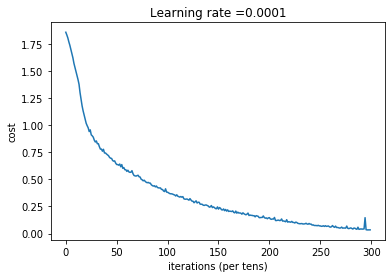

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.725


In [89]:
parameters = model(X_train, Y_train, X_test, Y_test)

Your algorithm predicts: y = 4


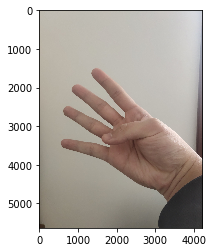

In [94]:

from PIL import Image
from matplotlib.pyplot import imread
from skimage.transform import resize


my_image = "myhand.jpg"

fname = my_image
image = np.array(imread(fname))
my_image = resize(image, output_shape=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))